In [43]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn as nn
from torch.autograd import Variable

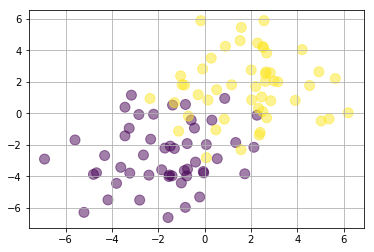

In [44]:
# Generate and plot the dataset
N = 100
D = 2
n = int(100/2)

X = np.random.randn(N,D)*2

# center the first N/2 points at (-2,-2)
X[:n,:] = X[:n,:] - 2*np.ones((n,D))

# center the last N/2 points at (2, 2)
X[n:,:] = X[n:,:] + 2*np.ones((n,D))

# labels: first N/2 are 0, last N/2 are 1
T = np.array([0]*(n) + [1]*(n)).reshape(100,1)

x_data = Variable(torch.Tensor(X))
y_data = Variable(torch.Tensor(T))

plt.scatter(X[:,0], X[:,1], c=T.reshape(N), s=100, alpha=0.5)
plt.grid()

In [45]:
# step 1: define the model
class LinearLogisticModel(nn.Module):
    def __init__(self):
        super(LinearLogisticModel,self).__init__() 
        self.linear = nn.Linear(2, 1) # 1 input, 1 output

    # Overrides the forward pass method
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    
    def predict(self, x):
        y_pred = self.forward(x)
        if y_pred >= 0.5:
            return 1
        else:
            return 0

In [46]:
model = LinearLogisticModel()

# step 2: define cost function (loss) and optimizer

# hyper parameters tuning
alpha = 0.01

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

Text(0.5,0,'epoch')

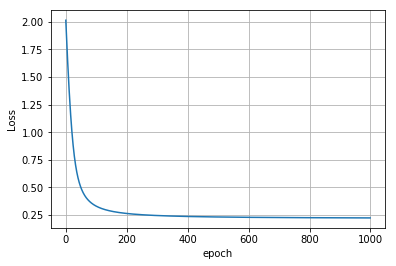

In [47]:
# step 3: train the model with data

J = []
epochs = 1000

for i in range(epochs):
    # Forward pass
    y_pred = model.forward(x_data)
    
    # Loss computation
    loss = criterion(y_pred,y_data)
    #print("epoch:", i, "loss:", loss.item())
    J.append(loss.item())
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
plt.plot(range(epochs),J)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('epoch')

In [48]:
# Model Parameters     
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

print("w0: ", w0)
print("w1: ", w1)

w0:  [[0.71890885 0.87440944]]
w1:  [0.12227551]


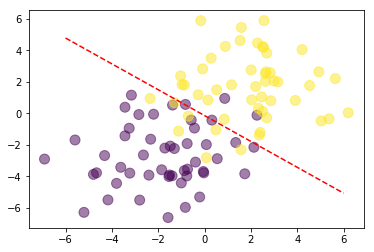

In [49]:
plt.scatter(X[:,0], X[:,1], c=T.reshape(N), s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
line_up, = plt.plot(x_axis, y_axis,'r--', label='gradient descent')

In [50]:
# Predict new data using trained model:
x_test0 = Variable(torch.Tensor([-6.0,-6.0]))
x_test1 = Variable(torch.Tensor([2.0,4.0]))

print(model.predict(x_test0))
print(model.predict(x_test1))

0
1
